In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Рекомендации на основе кластеризации

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
data = df.copy()

data = data.drop(['CustomerID'], axis=1)

data['Gender'] = data['Gender'].replace('Male', 0)
data['Gender'] = data['Gender'].replace('Female', 1)

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


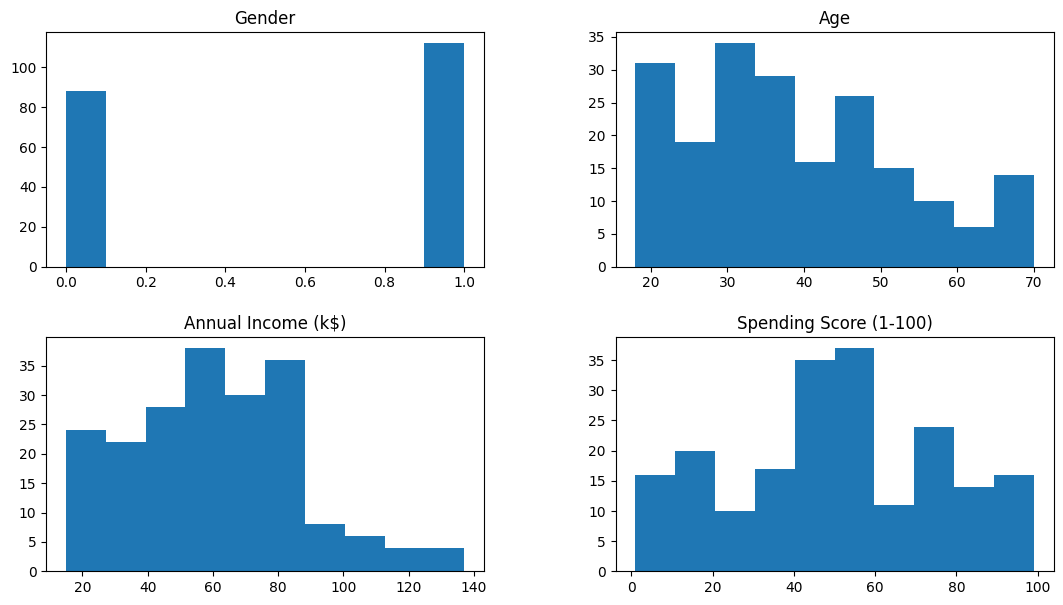

In [10]:
data.hist(figsize=(13, 7), grid=False)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
X = df_scaled

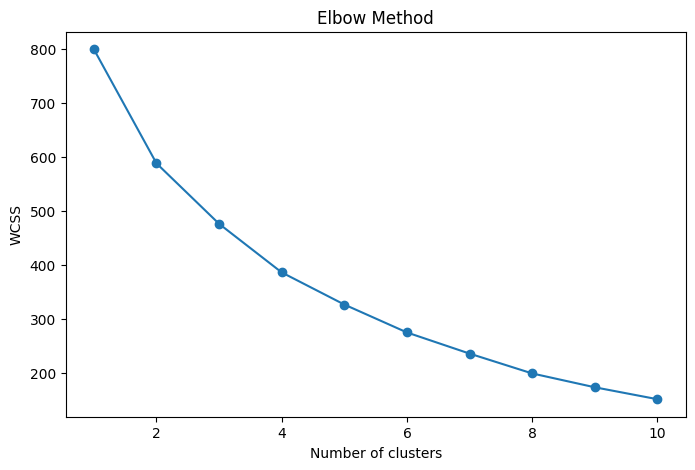

In [14]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

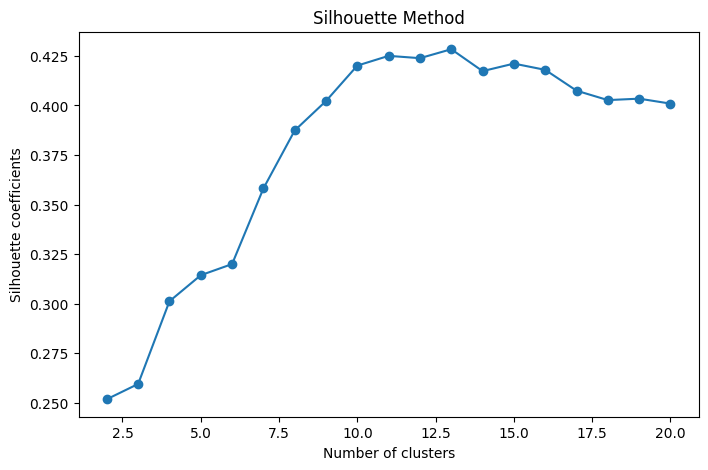

In [15]:
silhouette_coefficients = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 21), silhouette_coefficients, marker='o')
plt.title('Silhouette Method')    # Метод силуэтного коэффициента
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficients')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)
print('K-means with 4 clusters Silhouette Score =', silhouette_score(X, kmeans_labels))

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)
print('K-means with 5 clusters Silhouette Score =', silhouette_score(X, kmeans_labels))

K-means with 4 clusters Silhouette Score = 0.30123231688013513
K-means with 5 clusters Silhouette Score = 0.31437614343154285


Проведем расчет по 5 кластерам

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_labels'] = kmeans_labels

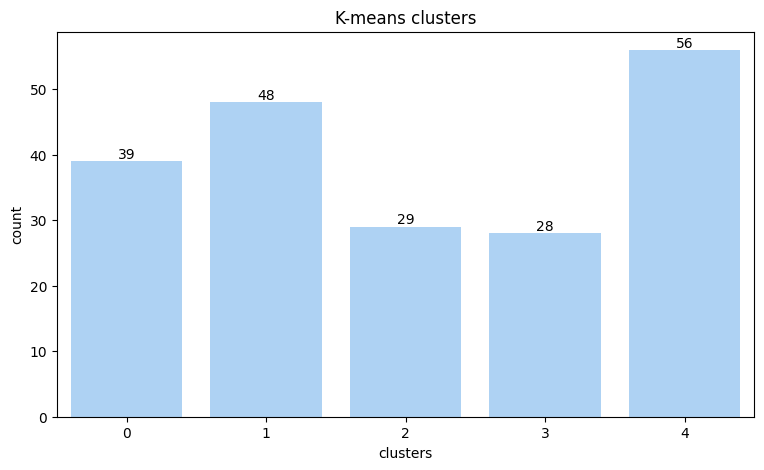

In [18]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x=data['kmeans_labels'], color='#a2d2ff')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('K-means clusters')
plt.xlabel('clusters')
plt.show()

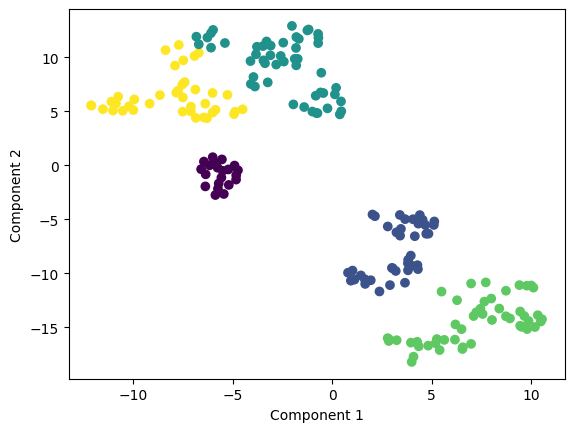

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=10).fit_transform(df_scaled)

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(tsne)

plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans.labels_)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Cluster 0

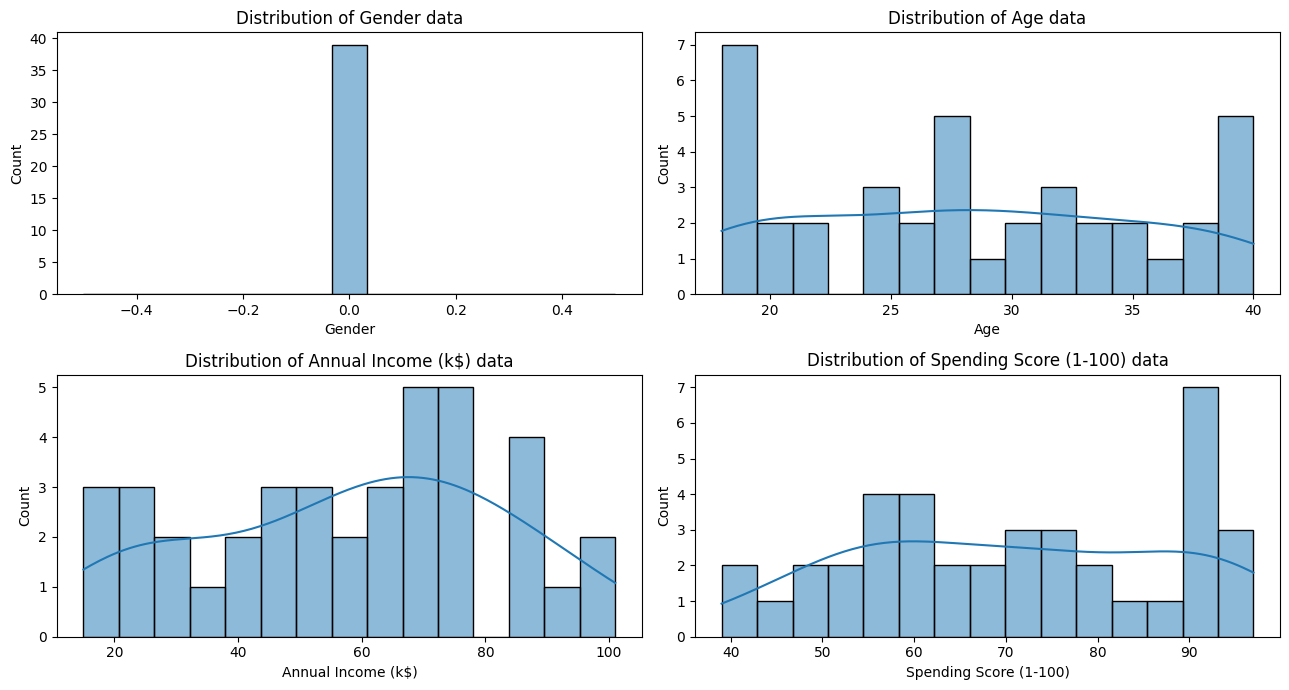

In [20]:
data_cluster = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']][data['kmeans_labels'] == 0]

plt.figure(figsize = (13, 7))
for i, col in enumerate(data_cluster.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=data_cluster[col], kde=True, bins=15)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
plt.show()

Cluster 1

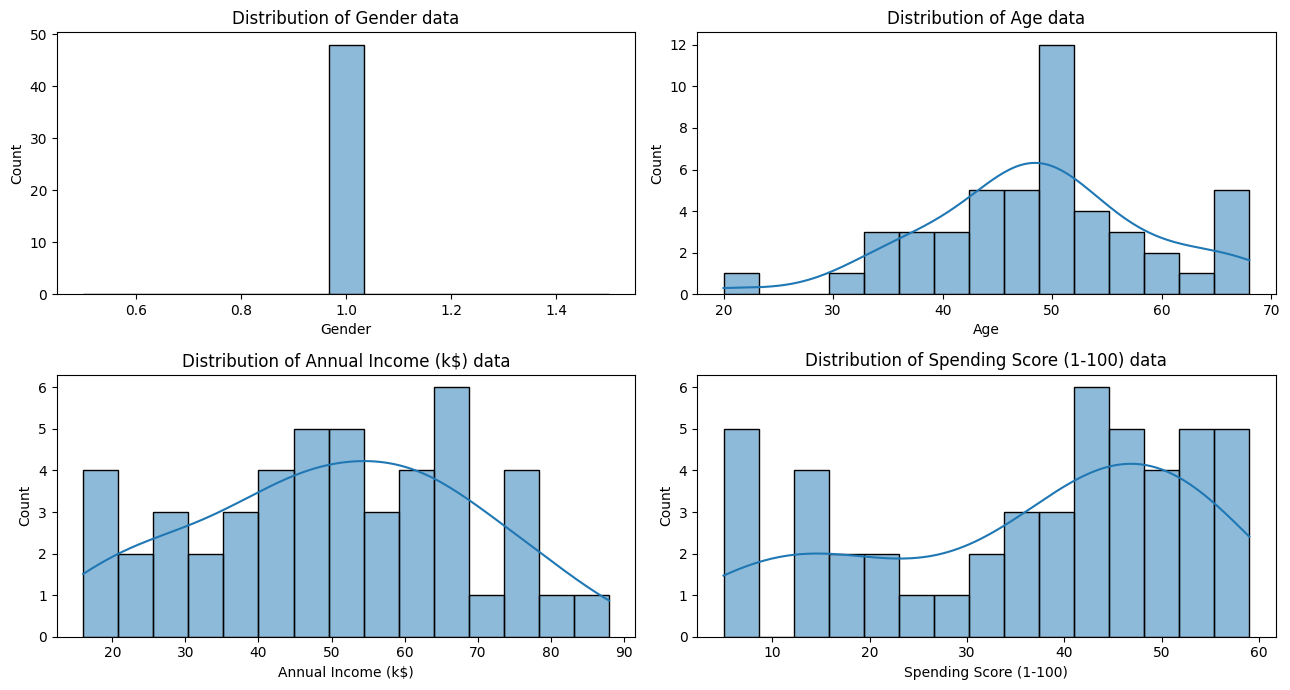

In [21]:
data_cluster = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']][data['kmeans_labels'] == 1]

plt.figure(figsize = (13, 7))
for i, col in enumerate(data_cluster.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=data_cluster[col], kde=True, bins=15)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
plt.show()

Cluster 2

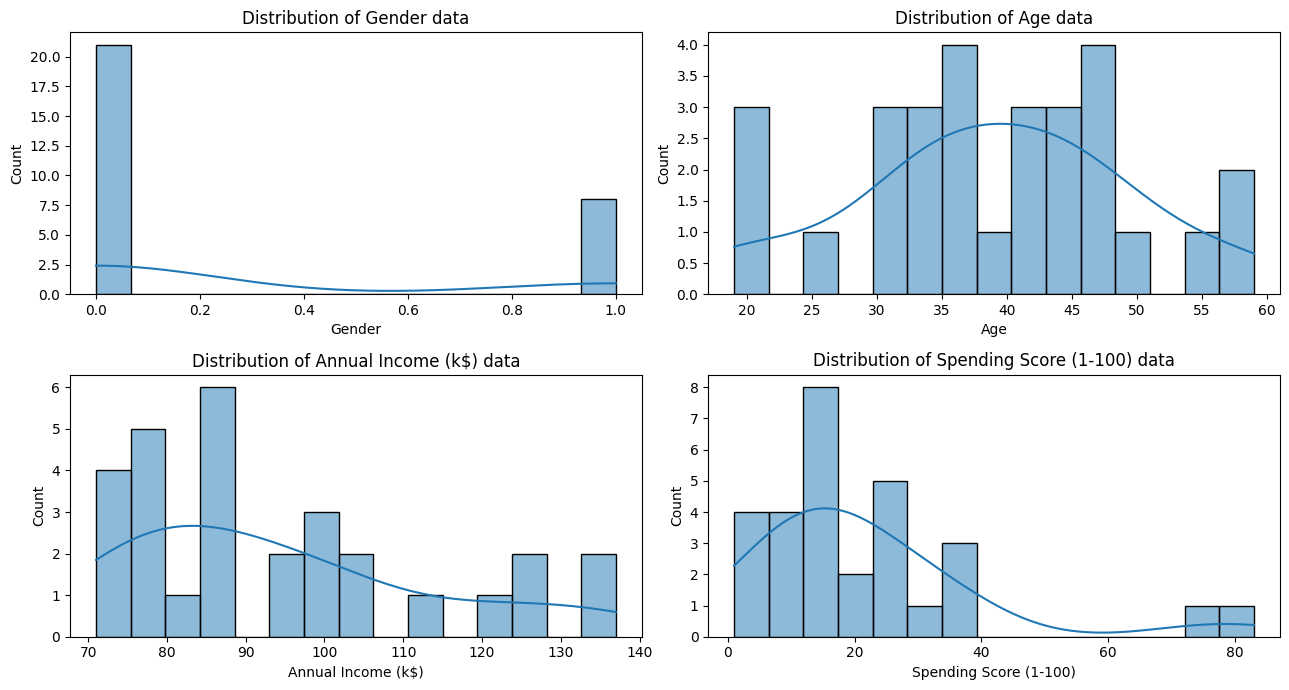

In [22]:
data_cluster = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']][data['kmeans_labels'] == 2]

plt.figure(figsize = (13, 7))
for i, col in enumerate(data_cluster.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=data_cluster[col], kde=True, bins=15)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
plt.show()

Cluster 3

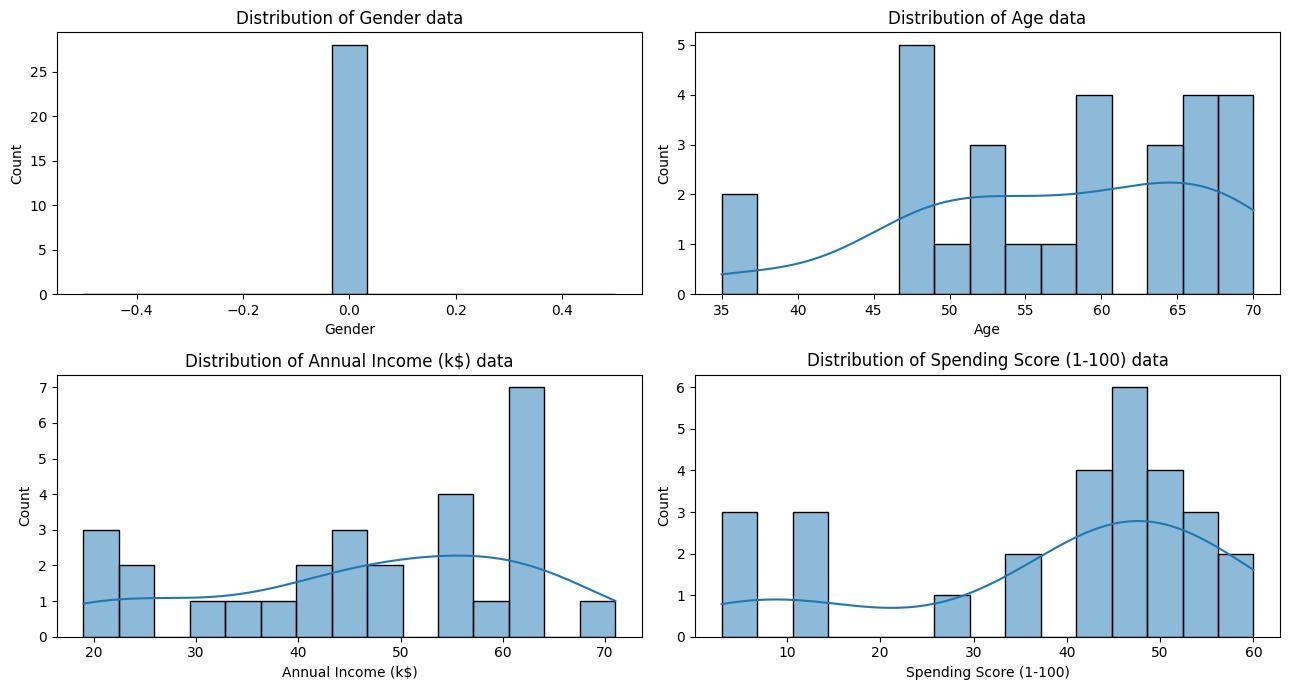

In [23]:
data_cluster = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']][data['kmeans_labels'] == 3]

plt.figure(figsize = (13, 7))
for i, col in enumerate(data_cluster.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=data_cluster[col], kde=True, bins=15)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
plt.show()

Cluster 4

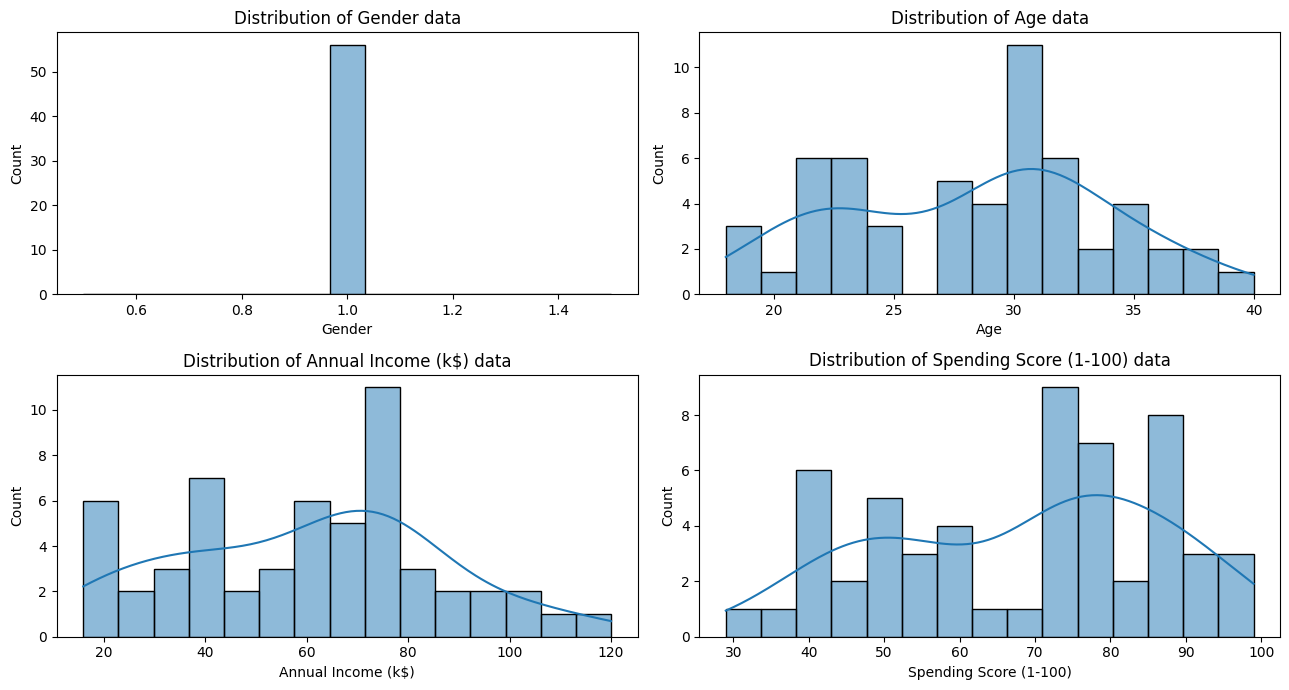

In [24]:
data_cluster = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']][data['kmeans_labels'] == 4]

plt.figure(figsize = (13, 7))
for i, col in enumerate(data_cluster.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=data_cluster[col], kde=True, bins=15)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
plt.show()

In [25]:
data.groupby('kmeans_labels')[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
kmeans_labels,,,,
0,0.000000,28.410256,58.230769,70.717949
1,1.000000,48.791667,50.333333,36.395833
2,0.275862,38.896552,94.172414,21.827586
3,0.000000,57.214286,46.785714,38.714286
4,1.000000,28.392857,60.428571,68.178571


Кластер 0:
Молодые мужчины с чуть выше среднего доходом и высокими расходами.

Кластер 1:
Женщины среднего возраста со средним доходом и низкими тратами.

Кластер 2:
Мужчины и женщины молодого и среднего возрастов с высоким доходом и низкими тратами.

Кластер 3:
Мужчины среднего возраста с доходом чуть ниже среднего и низкими тратами.

Кластер 4:
Молодые женщины с доходом выше среднего и большими тратами.

По итогам кластеризации можно сделать выводы:

Молодое поколение с доходом средним / чуть выше среднего больше совершают трат.

У людей среднего возраста со средним / чуть ниже среднего доходом низкие траты.

Также есть категория людей с высоким доходом, но низкими расходами.

# Рекомендации на основе словестного описания

In [26]:
df = pd.read_csv('goodreads_data.csv')
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [27]:
df.shape

(10000, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [29]:
df.isnull().sum()

Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

In [30]:
df = df.drop(['Unnamed: 0'], axis=1)
df['Genres'] = df['Genres'].apply(lambda x: x.replace("'", '').replace('[', '').replace(']', ''))
df['Num_Ratings'] = df['Num_Ratings'].apply(lambda x: x.replace(',', '')).astype(int)

df[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7']] = df['Genres'].str.split(',', n=7, expand=True)
df['Genre1'] = df['Genre1'].str.strip()
df['Genre2'] = df['Genre2'].str.strip()
df['Genre3'] = df['Genre3'].str.strip()
df['Genre4'] = df['Genre4'].str.strip()
df['Genre5'] = df['Genre5'].str.strip()
df['Genre6'] = df['Genre6'].str.strip()
df['Genre7'] = df['Genre7'].str.strip()

In [31]:
df.head()

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",4.27,5691311,https://www.goodreads.com/book/show/2657.To_Ki...,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"Fantasy, Fiction, Young Adult, Magic, Children...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,Fantasy,Fiction,Young Adult,Magic,Childrens,Middle Grade,Classics
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",4.28,3944155,https://www.goodreads.com/book/show/1885.Pride...,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"Classics, Nonfiction, History, Biography, Memo...",4.18,3488438,https://www.goodreads.com/book/show/48855.The_...,Classics,Nonfiction,History,Biography,Memoir,Historical,Holocaust
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"Classics, Fiction, Dystopia, Fantasy, Politics...",3.98,3575172,https://www.goodreads.com/book/show/170448.Ani...,Classics,Fiction,Dystopia,Fantasy,Politics,School,Literature


In [32]:
df.describe()

,Avg_Rating,Num_Ratings
count,10000.000000,1.000000e+04
mean,4.068577,9.305497e+04
std,0.335359,3.421488e+05
min,0.000000,0.000000e+00
25%,3.880000,5.180000e+02
50%,4.080000,1.584350e+04
75%,4.260000,6.475100e+04
max,5.000000,9.278135e+06


In [33]:
df.nunique()

Book            9871
Author          6064
Description     9888
Genres          8043
Avg_Rating       211
Num_Ratings     7545
URL            10000
Genre1           208
Genre2           268
Genre3           337
Genre4           372
Genre5           396
Genre6           437
Genre7           467
dtype: int64

In [34]:
from sklearn.metrics.pairwise import euclidean_distances

In [35]:
# Используем только те записи, которые имеют описание
data = df.dropna(subset=['Description'])

**Description Recomendation**

In [36]:
def description_recommendations(book_name, metric='cosine'):
  descriptions = data['Description']
  # Преобразуем описания в векторный формат с помощью TF-IDF
  tfidf_vectorizer = TfidfVectorizer(stop_words='english')
  tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

  if metric == 'cosine':
    # Вычисляем косинусное сходство между фильмами
    sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    reverse = True
  elif metric == 'euclidean':
    # Евклидово расстояние
    sim = euclidean_distances(tfidf_matrix, tfidf_matrix)
    reverse = False

  idx = data.index[data['Book'] == book_name].tolist()[0]
  sim_scores = list(enumerate(sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=reverse)
  sim_scores = sim_scores[1:6]  # Получаем 5 самых похожих книг
  movie_indices = [i[0] for i in sim_scores]
  rec_books = data['Book'].iloc[movie_indices]
  return(f'People who read the book "{book_name}" may like the following books: \n{", ".join(i for i in rec_books)}.')

In [37]:
print('Косинусное сходство')
print(description_recommendations('Harry Potter and the Philosopher’s Stone (Harry Potter, #1)', metric='cosine'))

print('\nЕвклидово расстояние')
print(description_recommendations('Harry Potter and the Philosopher’s Stone (Harry Potter, #1)', metric='euclidean'))

Косинусное сходство
People who read the book "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)" may like the following books: 
Harry Potter and the Goblet of Fire (Harry Potter, #4), Harry Potter and the Chamber of Secrets (Harry Potter, #2), Harry Potter and the Prisoner of Azkaban (Harry Potter, #3), Harry Potter and the Order of the Phoenix (Harry Potter, #5), Harry Potter and the Cursed Child: Parts One and Two (Harry Potter, #8).

Евклидово расстояние
People who read the book "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)" may like the following books: 
Harry Potter and the Goblet of Fire (Harry Potter, #4), Moonraker's Bride, Harry Potter and the Chamber of Secrets (Harry Potter, #2), Harry Potter and the Prisoner of Azkaban (Harry Potter, #3), Harry Potter and the Order of the Phoenix (Harry Potter, #5).


In [38]:
print('Косинусное сходство')
print(description_recommendations('To Kill a Mockingbird', metric='cosine'))

print('\nЕвклидово расстояние')
print(description_recommendations('To Kill a Mockingbird', metric='euclidean'))

Косинусное сходство
People who read the book "To Kill a Mockingbird" may like the following books: 
Go Set a Watchman, Harper Lee's To Kill a Mockingbird, Return to the Castle (Castle of Mysteries #2), The Chronicles of Prydain (The Chronicles of Prydain #1-5), Discovery of a Hidden Castle (A Gypsy Curse #1).

Евклидово расстояние
People who read the book "To Kill a Mockingbird" may like the following books: 
Moonraker's Bride, Go Set a Watchman, Harper Lee's To Kill a Mockingbird, Return to the Castle (Castle of Mysteries #2), The Chronicles of Prydain (The Chronicles of Prydain #1-5).


**Description & Genre Recomendation**

In [39]:
def description_genre_recommendations(book_name, genre, metric='cosine'):
  temp = data[(data['Genre1'] == genre) | (data['Genre2'] == genre) | (data['Genre3'] == genre) | (data['Genre4'] == genre) | (data['Genre5'] == genre) | (data['Genre6'] == genre) | (data['Genre7'] == genre)]
  descriptions = temp['Description']
  # Преобразуем описания в векторный формат с помощью TF-IDF
  tfidf_vectorizer = TfidfVectorizer(stop_words='english')
  tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

  if metric == 'cosine':
    # Вычисляем косинусное сходство между фильмами
    sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    reverse = True
  elif metric == 'euclidean':
    # Евклидово расстояние
    sim = euclidean_distances(tfidf_matrix, tfidf_matrix)
    reverse = False

  idx = temp.index[temp['Book'] == book_name].tolist()[0]
  sim_scores = list(enumerate(sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=reverse)
  sim_scores = sim_scores[1:6]  # Получаем 5 самых похожих книг
  movie_indices = [i[0] for i in sim_scores]
  rec_books = temp['Book'].iloc[movie_indices]
  return(f'People who read the book "{book_name}" with genre {genre} may like the following books: \n{", ".join(i for i in rec_books)}.')

In [40]:
print('Косинусное сходство')
print(description_genre_recommendations(book_name='Harry Potter and the Philosopher’s Stone (Harry Potter, #1)', genre='Fantasy', metric='cosine'))

print('\nЕвклидово расстояние')
print(description_genre_recommendations(book_name='Harry Potter and the Philosopher’s Stone (Harry Potter, #1)', genre='Fantasy', metric='euclidean'))

Косинусное сходство
People who read the book "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)" with genre Fantasy may like the following books: 
Animal Farm / 1984, Just So Stories, Watership Down (Watership Down, #1), The Last Wish (The Witcher, #0.5), The Tommyknockers.

Евклидово расстояние
People who read the book "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)" with genre Fantasy may like the following books: 
Animal Farm / 1984, Just So Stories, Watership Down (Watership Down, #1), The Last Wish (The Witcher, #0.5), The Tommyknockers.


In [41]:
print('Косинусное сходство')
print(description_genre_recommendations(book_name='To Kill a Mockingbird', genre='Fiction', metric='cosine'))

print('\nЕвклидово расстояние')
print(description_genre_recommendations(book_name='To Kill a Mockingbird', genre='Fiction', metric='euclidean'))

Косинусное сходство
People who read the book "To Kill a Mockingbird" with genre Fiction may like the following books: 
Go Set a Watchman, Harper Lee's To Kill a Mockingbird, The Chronicles of Prydain (The Chronicles of Prydain #1-5), Mockingbird, The Deep End of the Ocean (Cappadora Family, #1).

Евклидово расстояние
People who read the book "To Kill a Mockingbird" with genre Fiction may like the following books: 
Moonraker's Bride, Go Set a Watchman, Harper Lee's To Kill a Mockingbird, The Chronicles of Prydain (The Chronicles of Prydain #1-5), Mockingbird.


# Рекомендации на основе коллаборативных фильтров

In [42]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
movies.shape

(27278, 3)

In [44]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [45]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [46]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [47]:
ratings.shape

(1048575, 4)

In [48]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [49]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [50]:
ratings = ratings.drop(['timestamp'], axis=1)

In [51]:
# Отберем данные, у которых количество оценок фильма больше 100
movies_votes = ratings.groupby('movieId').agg('count')['rating']
movies_votes = movies_votes[movies_votes > 100]
movie_ratings = ratings[ratings['movieId'].isin(movies_votes)]
movie_ratings.head()

,userId,movieId,rating
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [52]:
movie_ratings.shape

(227913, 3)

In [53]:
user_item_matrix = movie_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating')
user_item_matrix.fillna(0, inplace = True)
user_item_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [54]:
user_item_matrix.shape

(719, 7089)

**Item-Based Recommendation**

In [55]:
item_corr = user_item_matrix.T.corr()
item_corr.head()

movieId,101,102,103,104,105,106,107,108,109,110,...,2598,2705,2711,2799,2874,3129,3216,3247,3476,3498
movieId,,,,,,,,,,,,,,,,,,,,,
101,1.000000,0.021574,0.029022,0.151120,0.016352,0.066757,0.056252,0.018315,-0.002451,0.068005,...,0.126208,-0.004970,0.052568,0.060403,-0.010139,0.199635,-0.003523,0.105967,0.133446,0.115359
102,0.021574,1.000000,0.118740,0.138671,0.076617,-0.003998,0.131014,0.058257,-0.001582,-0.016834,...,0.015383,-0.003208,0.024320,0.022546,0.009717,0.016186,-0.002274,0.016652,0.015061,0.006673
103,0.029022,0.118740,1.000000,0.049397,0.051193,-0.002773,0.058407,0.117419,-0.001097,0.007360,...,0.002509,-0.002225,-0.003560,0.001303,-0.004539,0.012681,-0.001577,0.010445,0.006075,0.005599
104,0.151120,0.138671,0.049397,1.000000,0.020040,0.011256,0.127216,0.002703,0.023901,0.112869,...,0.093451,-0.010811,-0.010562,0.111663,-0.016041,0.048302,0.007186,0.162921,0.078097,0.042773
105,0.016352,0.076617,0.051193,0.020040,1.000000,0.018519,0.022112,0.014163,0.045468,0.124039,...,0.052120,-0.007531,0.013171,0.008315,0.011561,0.027947,0.014520,0.058520,0.032986,0.066864


In [56]:
# Item-Based recommendation

def item_recommendations(movie_name):
  movie_id = movies['movieId'][movies['title'] == movie_name]
  movie_id = int(movie_id.iloc[0])

  sim_movies = item_corr[movie_id].sort_values(ascending=False)
  sim_movies = sim_movies[sim_movies > 0]
  sim_movies = sim_movies[1:6]

  rec_movies = movies['title'][movies['movieId'].isin(sim_movies.index)]

  print(f'People who watched movie "{movie_name}" may like the following movies: \n{", ".join(i for i in rec_movies)}.')

In [57]:
item_recommendations(movie_name = 'Bottle Rocket (1996)')

People who watched movie "Bottle Rocket (1996)" may like the following movies: 
Flirting With Disaster (1996), Swimming with Sharks (1995), Dazed and Confused (1993), Welcome to the Dollhouse (1995), Raging Bull (1980).


In [58]:
item_recommendations(movie_name = 'Taxi Driver (1976)')

People who watched movie "Taxi Driver (1976)" may like the following movies: 
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Godfather, The (1972), Citizen Kane (1941), Reservoir Dogs (1992), Raging Bull (1980).


**User-Based Recommendation**

In [59]:
user_corr = user_item_matrix.corr()
user_corr.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.263077,0.419718,0.050080,0.248071,0.089782,0.129479,0.099508,-0.010324,0.165433,...,0.295833,-0.017624,0.100788,0.054221,0.094069,0.272244,0.330576,0.281261,0.083462,0.184954
2,0.263077,1.000000,0.371185,0.157043,0.189396,0.092856,0.303883,0.191285,-0.006135,0.113101,...,0.129094,-0.010473,0.175695,-0.009660,0.111041,0.250002,0.108934,-0.008357,0.248268,0.291669
3,0.419718,0.371185,1.000000,0.095812,0.228318,0.063669,0.257055,0.156023,0.147626,0.240776,...,0.231483,-0.019437,0.198274,0.166846,0.125632,0.213521,0.286081,0.228165,0.236788,0.045546
4,0.050080,0.157043,0.095812,1.000000,0.401709,-0.020631,0.146235,0.286473,0.149598,0.051290,...,0.167627,0.095868,0.392330,-0.013441,0.232446,0.219604,0.312108,-0.011628,0.268516,-0.019374
5,0.248071,0.189396,0.228318,0.401709,1.000000,0.264360,0.288752,0.347913,-0.012740,0.105550,...,0.247547,-0.021750,0.437787,0.060517,0.396671,0.398140,0.444445,0.178703,0.391018,0.149775


In [60]:
# User-Based recommendation

def user_recommendations(user_id):
  # Наиболее похожие пользователи
  sim_users = user_corr[user_id]
  sim_users = sim_users[sim_users >= 0.5]

  # Какие фильмы пользователь уже смотрел
  user_watched = ratings['movieId'][ratings['userId'] == user_id]

  # Находим каким фильмам какие оценки проставляли похожие пользователи + исключаем фильмы, которые пользователь уже смотрел
  users_ratings = ratings[(ratings['userId'].isin(sim_users.index)) & (~ratings['movieId'].isin(user_watched))]

  # Определяем фильмы для рекомендации
  user_movies = users_ratings.groupby('movieId')['rating'].agg(['mean', 'count'])
  user_movies = user_movies[(user_movies['mean'] >= 3.5) & (user_movies['count'] > 10)].sort_values(by='mean', ascending=False)
  user_movies = user_movies[0:5]

  rec_movies = movies['title'][movies['movieId'].isin(user_movies.index)]

  print(f'User № {user_id} may like the following movies: \n{"; ".join(i for i in rec_movies)}.')

In [61]:
user_recommendations(user_id=1)

User № 1 may like the following movies: 
Taxi Driver (1976); Godfather, The (1972); Goodfellas (1990); Godfather: Part II, The (1974); Matrix, The (1999).


In [62]:
user_recommendations(user_id=5)

User № 5 may like the following movies: 
Schindler's List (1993); Lord of the Rings: The Fellowship of the Ring, The (2001); Bourne Identity, The (2002); Lord of the Rings: The Two Towers, The (2002); Lord of the Rings: The Return of the King, The (2003).
